# Machine Learning Assignment


## Loading the dataset

In [1]:
# Data, Datasets & Utils
import pandas as pd
from pandas.plotting import scatter_matrix
import pprint
import numpy as np
from time import time
from numpy import log2 as log

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB


# Hyper-parameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Feature selection & feature engineering
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Stats
from scipy.stats import randint as sp_randint
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro     # Shapiro Wilk
from scipy.stats import normaltest  # D’Agostino’s K^2
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import ttest_ind    # independent student t-test; assumes normality
from scipy.stats import mannwhitneyu # non-parametric; doesn't assume normality

# Visualisation
import matplotlib.pyplot as plot 
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz



In [2]:
#Reading data set file

df = pd.read_csv('data/breast-cancer.csv')

print("Shape:\n\n",df.shape) #tells us how many rows and columns the data structer has got
print(df.info())

df.head()

print("\nUnique Values in 'Diagnosis'", list(df.Diagnosis.unique()))



Shape:

 (569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          568 non-null    float64
 1   Radius (Mean)               550 non-null    float64
 2   Texture (Mean)              568 non-null    float64
 3   Perimeter (Mean)            567 non-null    float64
 4   Area (Mean)                 566 non-null    float64
 5   Smoothness (Mean)           567 non-null    float64
 6   Compactness (Mean)          566 non-null    float64
 7   Concavity (Mean)            569 non-null    float64
 8   Concave Points (Mean)       569 non-null    float64
 9   Symmetry (Mean)             566 non-null    float64
 10  Fractal Dimension (Mean)    567 non-null    float64
 11  Radius (Error)              551 non-null    float64
 12   Texture (Error)            567 non-null    float64
 13   Perimeter (Erro

In [3]:
# TODO: your own data cleaning, e.g., dealing with the missing values and converting the feature column (to numeric)
df.duplicated().value_counts()


False    569
dtype: int64

In [4]:
df.isnull()

,ID,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),Symmetry (Mean),...,Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst),Diagnosis
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


ID                             1
Radius (Mean)                 19
Texture (Mean)                 1
Perimeter (Mean)               2
Area (Mean)                    3
Smoothness (Mean)              2
Compactness (Mean)             3
Concavity (Mean)               0
Concave Points (Mean)          0
Symmetry (Mean)                3
Fractal Dimension (Mean)       2
Radius (Error)                18
 Texture (Error)               2
 Perimeter (Error)             1
 Area (Error)                  2
 Smoothness (Error)            3
 Compactness (Error)           1
 Concavity (Error)             1
 Concave Points (Error)        2
 Symmetry (Error)              1
 Fractal Dimension (Error)     2
 Radius (Worst)               18
 Texture (Worst)               3
 Perimeter (Worst)             2
 Area (Worst)                  3
 Smoothness (Worst)            0
 Compactness (Worst)           4
 Concavity (Worst)             2
Concave Points (Worst)         3
Symmetry (Worst)               3
Fractal Di

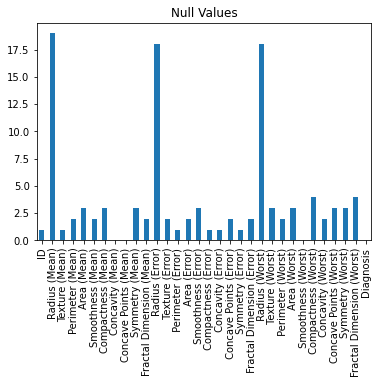

In [5]:
df.isnull().sum().plot(kind='bar', title='Null Values');
df.isnull().sum() #total of 111 missing vals

In [6]:
df = df.fillna(df.mean())
df.isnull().sum()

ID                            0
Radius (Mean)                 0
Texture (Mean)                0
Perimeter (Mean)              0
Area (Mean)                   0
Smoothness (Mean)             0
Compactness (Mean)            0
Concavity (Mean)              0
Concave Points (Mean)         0
Symmetry (Mean)               0
Fractal Dimension (Mean)      0
Radius (Error)                0
 Texture (Error)              0
 Perimeter (Error)            0
 Area (Error)                 0
 Smoothness (Error)           0
 Compactness (Error)          0
 Concavity (Error)            0
 Concave Points (Error)       0
 Symmetry (Error)             0
 Fractal Dimension (Error)    0
 Radius (Worst)               0
 Texture (Worst)              0
 Perimeter (Worst)            0
 Area (Worst)                 0
 Smoothness (Worst)           0
 Compactness (Worst)          0
 Concavity (Worst)            0
Concave Points (Worst)        0
Symmetry (Worst)              0
Fractal Dimension (Worst)     0
Diagnosi

In [7]:
df.duplicated().value_counts()
df.duplicated().sum() 
#still no duplicated values! good? 

0

In [8]:
# Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
X = df.iloc[:,1:31]
y = df['Diagnosis']

df['Diagnosis'].replace('M',1,inplace=True)
df['Diagnosis'].replace('B', 0,inplace=True)

# Transform class labels to numeric labels
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

#print(X)

# Instantiating classifier (with default hyper-parameter values)
model = DecisionTreeClassifier()

# Instantiating (setting up) RFE
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')

start_time = time()
rfecv.fit(X, y)
end_time = time()

# Printing out the results
print("RFECV took %.2f seconds to identify %d features" % 
      ((end_time - start_time), rfecv.n_features_))

print(rfecv.ranking_)




RFECV took 0.66 seconds to identify 4 features
[26  1 17  6 16 15  1 14 10 18 27 23 12  7  9 25 24 22  2 13 11  3  5  1
 19  8  4  1 20 21]


In [9]:
# Creating a DataFrame to display the original columns and their ranking
feature_ranking_df = np.array([])
feature_ranking_df = pd.DataFrame()
feature_ranking_df['feature'] = df.iloc[:,1:31].columns
feature_ranking_df['rank'] = rfecv.ranking_

feature_ranking_df = feature_ranking_df.sort_values(by='rank', ascending=True)
feature_ranking_df

,feature,rank
1,Texture (Mean),1
23,Area (Worst),1
27,Concave Points (Worst),1
6,Concavity (Mean),1
18,Symmetry (Error),2
21,Texture (Worst),3
26,Concavity (Worst),4
22,Perimeter (Worst),5
3,Area (Mean),6
13,Area (Error),7


In [10]:
# importing 3 different tests for normality
from scipy.stats import shapiro     # Shapiro Wilk
from scipy.stats import normaltest  # D’Agostino’s K^2
from scipy.stats import anderson    # Anderson-Darling

n = 32 # used to set how many samples for the distributions created below
alpha = 0.05
#p <= alpha: reject H0, not normal. 
#p > alpha: fail to reject H0, normal.
# w = stats -> quantity calucated by the tests that can be interpretedin the context of the comparing with critical values 

sample_uniform = np.random.uniform(df, size=n)

print("Normality tests (of uniform distribution)")
stat, p = shapiro(sample_uniform)
print(' - Shapiro:    W = %0.2f, p-value = %0.2f' % (stat, p))
#stat, p = normaltest(sample_uniform)
#print(' - D’Agostino: W = %0.2f, p-value = %0.2f' % (stat, p))

# bonus test from https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
result = anderson(sample_uniform)
print(' - Anderson-Darling statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('    %.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('    %.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

print()

Normality tests (of uniform distribution)
 - Shapiro:    W = 0.17, p-value = 0.00
 - Anderson-Darling statistic: 11.789
    15.000: 0.523, data does not look normal (reject H0)
    10.000: 0.596, data does not look normal (reject H0)
    5.000: 0.715, data does not look normal (reject H0)
    2.500: 0.834, data does not look normal (reject H0)
    1.000: 0.992, data does not look normal (reject H0)



In [11]:
#the following grid search were done out of curiosity

In [12]:
col = df.columns
print(col)

Index(['ID', 'Radius (Mean)', 'Texture (Mean)', 'Perimeter (Mean)',
       'Area (Mean)', 'Smoothness (Mean)', 'Compactness (Mean)',
       'Concavity (Mean)', 'Concave Points (Mean)', 'Symmetry (Mean)',
       'Fractal Dimension (Mean)', 'Radius (Error)', ' Texture (Error)',
       ' Perimeter (Error)', ' Area (Error)', ' Smoothness (Error)',
       ' Compactness (Error)', ' Concavity (Error)', ' Concave Points (Error)',
       ' Symmetry (Error)', ' Fractal Dimension (Error)', ' Radius (Worst)',
       ' Texture (Worst)', ' Perimeter (Worst)', ' Area (Worst)',
       ' Smoothness (Worst)', ' Compactness (Worst)', ' Concavity (Worst)',
       'Concave Points (Worst)', 'Symmetry (Worst)',
       'Fractal Dimension (Worst)', 'Diagnosis'],
      dtype='object')


In [13]:
df_1 = df.drop(columns = ['ID', 'Radius (Mean)', 'Perimeter (Mean)',
        'Smoothness (Mean)', 
        'Concave Points (Mean)', 'Symmetry (Mean)',
       'Fractal Dimension (Mean)', 'Radius (Error)', ' Texture (Error)',
       ' Perimeter (Error)', ' Area (Error)', ' Smoothness (Error)',
       ' Concavity (Error)', ' Concave Points (Error)', ' Compactness (Error)',
       ' Symmetry (Error)', ' Fractal Dimension (Error)', ' Radius (Worst)',
       ' Texture (Worst)', ' Perimeter (Worst)', 
       ' Smoothness (Worst)', ' Compactness (Worst)', ' Concavity (Worst)',
       'Symmetry (Worst)', 'Fractal Dimension (Worst)'])

print(df_1.columns)

Index(['Texture (Mean)', 'Area (Mean)', 'Compactness (Mean)',
       'Concavity (Mean)', ' Area (Worst)', 'Concave Points (Worst)',
       'Diagnosis'],
      dtype='object')


### Preparing the X and y arrays in preparation for running the machine learning classifier below

In [14]:
from sklearn import preprocessing

names = df.columns
scaler = MinMaxScaler() 
df = scaler.fit_transform(df) 
df = pd.DataFrame(df, columns=names)

# Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
X = df.drop(columns=['ID'])
y = df['Diagnosis']

# Transform class labels to numeric labels
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)


## Running Machine Learning classifier

You should replace some code indicated below to import, load and run your own classifier.

Literally just two lines where you need to update the code. Otherwise, this should be able to run your classifier, to demonstrate that it is working and running properly against the dataset provided.

In [17]:
from sklearn.model_selection import RepeatedStratifiedKFold 
from classifier import knn
#euclidean
# arrays for storing performance metrics
accuracy_list = np.array([])
precision_list = np.array([])
recall_list = np.array([])
n=20

for x in range(n):
    # Hold-out validation - 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=None, stratify=df['Diagnosis'])

        # Creating the model, training and testing it
    model = knn.KNearestNeighbor(k=6) # REPLACE WITH YOUR CLASSIFIER
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

        # Appending performance metrics to arrays created above
    accuracy_list = np.append(accuracy_list, metrics.accuracy_score(y_test, y_pred))
    precision_list = np.append(precision_list, metrics.precision_score(y_test, y_pred, average='macro', zero_division=0))
    recall_list = np.append(recall_list, metrics.recall_score(y_test, y_pred, average='macro', zero_division=0))

# printing out the performance metrics (mean + standard deviation)
print("Accuracy:  %0.2f (+/- %0.2f)" % (accuracy_list.mean(), accuracy_list.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision_list.mean(), precision_list.std() * 2))
print("Recall:    %0.2f (+/- %0.2f)" % (recall_list.mean(), recall_list.std() * 2))
print(confusion_matrix(y_test, y_pred))



Accuracy:  0.54 (+/- 0.24)
Precision: 0.27 (+/- 0.12)
Recall:    0.50 (+/- 0.00)
[[143   0]
 [ 85   0]]


In [18]:
from sklearn.model_selection import RepeatedStratifiedKFold 
from classifier import wokrM
#manhattan
#performance metrics
accuracy_list = np.array([])
precision_list = np.array([])
recall_list = np.array([])
n=20

for x in range(n):
    # Hold-out validation - 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=None, stratify=df['Diagnosis'])

        # Creating the model, training and testing it
    model = wokrM.KNearestNeighbor(k=6) # REPLACE WITH YOUR CLASSIFIER
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

        # Appending performance metrics to arrays created above
    accuracy_list = np.append(accuracy_list, metrics.accuracy_score(y_test, y_pred))
    precision_list = np.append(precision_list, metrics.precision_score(y_test, y_pred, average='macro', zero_division=0))
    recall_list = np.append(recall_list, metrics.recall_score(y_test, y_pred, average='macro', zero_division=0))

# printing out the performance metrics (mean + standard deviation)
print("Accuracy:  %0.2f (+/- %0.2f)" % (accuracy_list.mean(), accuracy_list.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision_list.mean(), precision_list.std() * 2))
print("Recall:    %0.2f (+/- %0.2f)" % (recall_list.mean(), recall_list.std() * 2))
print(confusion_matrix(y_test, y_pred))



Accuracy:  0.58 (+/- 0.20)
Precision: 0.29 (+/- 0.10)
Recall:    0.50 (+/- 0.00)
[[  0 143]
 [  0  85]]
